In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [248]:
df= pd.read_csv(r'/kaggle/input/quantium-forage-data-sets/QVI_transaction_data.csv')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [250]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [251]:
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [252]:
df['PDWT_grams'] = df['PROD_NAME'].replace('[a-zA-Z/&]', '', regex= True).astype('int')

In [253]:
df['PROD_NAME'] = df['PROD_NAME'].replace('[0-9]{2,3}[gG]$', '', regex= True).astype('str')

In [254]:
df['PROD_NAME'] = df['PROD_NAME'].replace('&', ' & ', regex= True).astype('str')

In [255]:
df['PROD_NAME'] = df['PROD_NAME'].replace(r'\s{2,4}',' ', regex= True).astype('str')

In [256]:
df['PROD_NAME'] = df['PROD_NAME'].replace(r'[/\*()_-]','', regex= True).astype('str')

In [257]:
df['PROD_NAME'] = df['PROD_NAME'].str.strip()

In [258]:
df['PROD_NAME'].unique()

array(['Natural Chip  Compny SeaSalt', 'CCs Nacho Cheese',
       'Smiths Crinkle Cut Chips Chicken',
       'Smiths Chip Thinly SCream & Onion',
       'Kettle Tortilla ChpsHny & Jlpno Chili',
       'Old El Paso Salsa Dip Tomato Mild',
       'Smiths Crinkle Chips Salt & Vinegar',
       'Grain Waves   Sweet Chilli', 'Doritos Corn Chip Mexican Jalapeno',
       'Grain Waves Sour Cream & Chives',
       'Kettle Sensations Siracha Lime', 'Twisties Cheese',
       'WW Crinkle Cut  Chicken', 'Thins Chips Light & Tangy',
       'CCs Original', 'Burger Rings', 'NCC Sour Cream &  Garden Chives',
       'Doritos Corn Chip Southern Chicken', 'Cheezels Cheese Box',
       'Smiths Crinkle  Original', 'Infzns Crn Crnchers Tangy Gcamole',
       'Kettle Sea Salt  And Vinegar', 'Smiths Chip Thinly Cut Original',
       'Kettle Original', 'Red Rock Deli Thai Chilli & Lime',
       'Pringles Sthrn FriedChicken', 'Pringles Sweet & Spcy BBQ',
       'Red Rock Deli SR Salsa & Mzzrlla', 'Thins Chips   O

In [259]:
df.drop_duplicates(inplace=True)

In [260]:
df_sort = df['PROD_NAME'].value_counts().reset_index()

In [261]:
df = df.merge(df_sort,on ='PROD_NAME').sort_values(by='count')

In [262]:
df = df.sort_values(by='count', ascending=False)

In [263]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PDWT_grams,count
207730,2019-01-13,79,79250,77824,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,3304
257265,2018-09-22,253,253173,253808,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,3304
72059,2018-12-07,59,59334,55965,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,3304
253416,2019-06-26,203,203219,203219,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,3304
241440,2018-08-03,37,37270,33845,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,3304


In [264]:
df.drop(columns='count', inplace=True)

In [265]:
df[df['PROD_NAME'].str.contains('Salsa', regex=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PDWT_grams
45592,2019-01-13,152,152210,151635,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300
160808,2018-09-01,125,125329,129602,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300
195163,2019-04-18,138,138127,141274,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300
194924,2018-07-27,134,134276,138110,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300
221873,2019-02-17,110,110119,112377,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300
...,...,...,...,...,...,...,...,...,...
213034,2018-09-21,183,183017,184857,76,Woolworths Medium Salsa,2,3.0,300
206919,2019-05-25,62,62256,59305,76,Woolworths Medium Salsa,2,3.0,300
223529,2019-02-06,152,152058,150597,76,Woolworths Medium Salsa,2,3.0,300
57605,2019-04-30,43,43208,40046,76,Woolworths Medium Salsa,2,3.0,300


In [266]:
df.isna().value_counts()

DATE   STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  TOT_SALES  PDWT_grams
False  False      False           False   False     False      False     False      False         264835
Name: count, dtype: int64

In [267]:
df[['PROD_QTY', 'TOT_SALES']].agg(['mean','max','min'])

,PROD_QTY,TOT_SALES
mean,1.907308,7.304205
max,200.000000,650.000000
min,1.000000,1.500000


In [268]:
df[df['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PDWT_grams
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [269]:
df[df['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PDWT_grams
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [270]:
df.drop(index=[69763,69762], inplace=True)

In [271]:
df['DATE'].value_counts()

DATE
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: count, Length: 364, dtype: int64

In [272]:
dates = pd.date_range(start='2018-07-01', end='2019-06-30')

In [273]:
dates = pd.DataFrame(dates)

In [274]:
dates.columns = ['DATE']

In [275]:
df = df.merge(dates, on='DATE', how='outer')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Customer Counts Over Time')

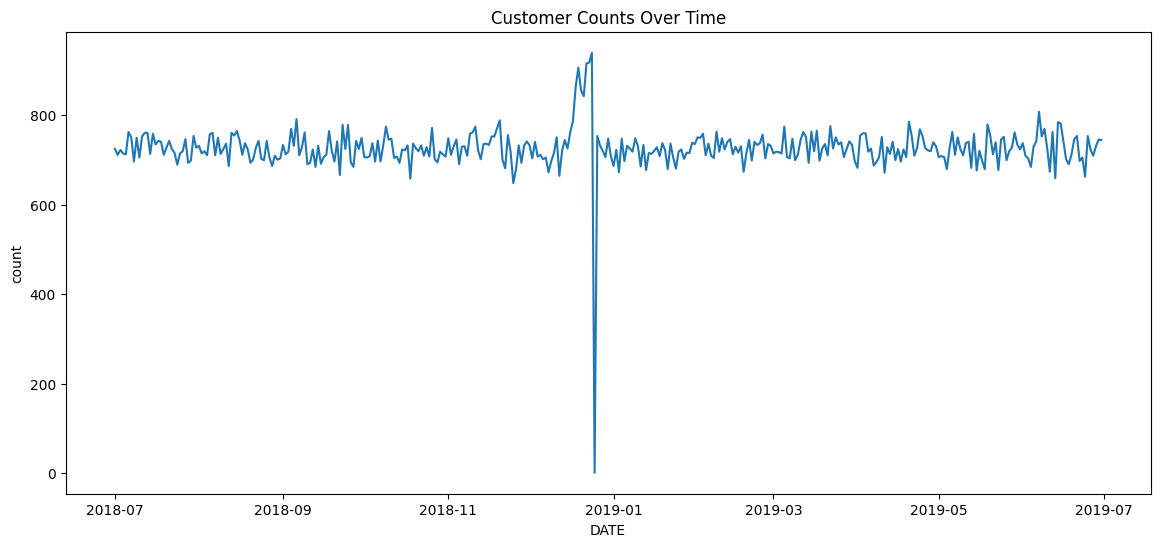

In [276]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df.value_counts(subset=df['DATE']).reset_index(), x='DATE', y='count').set_title('Customer Counts Over Time')

In [277]:
salecount = df.value_counts(subset=df['DATE']).reset_index()

In [278]:
sales_dec = salecount.query('"2018-12-01" <= DATE < "2019-01-01"').sort_values(by='DATE')
sales_dec

,DATE,count
146,2018-12-01,732
291,2018-12-02,703
107,2018-12-03,740
269,2018-12-04,707
243,2018-12-05,711
298,2018-12-06,701
285,2018-12-07,705
355,2018-12-08,672
314,2018-12-09,697
225,2018-12-10,715


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Customer Counts Over Time')

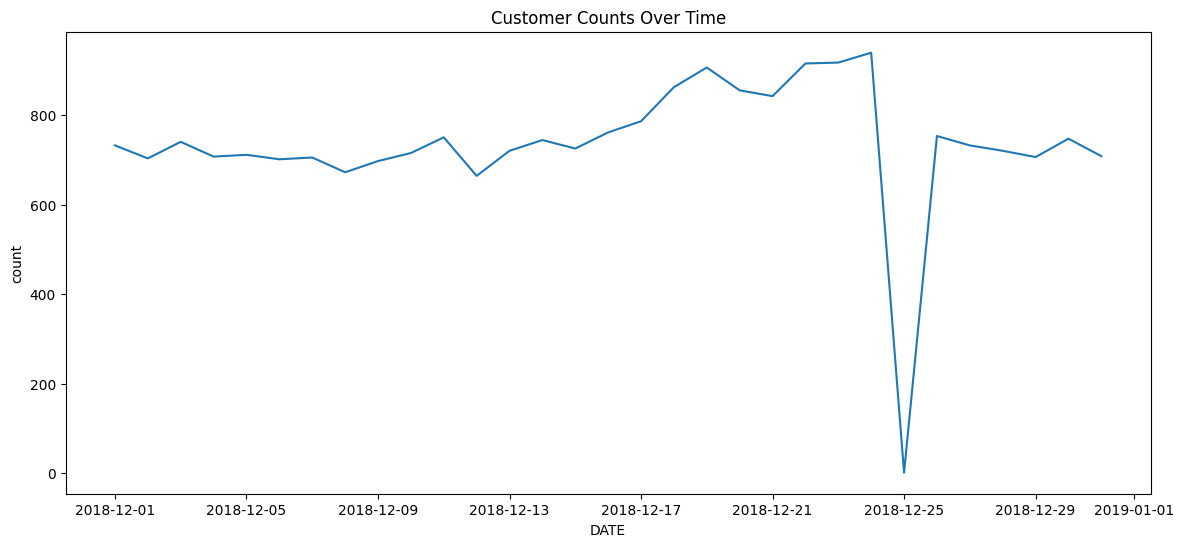

In [279]:
plt.figure(figsize=(14,6))
sns.lineplot(data=sales_dec, x='DATE', y='count').set_title('Customer Counts Over Time')

In [280]:
df[['DATE','TOT_SALES']].groupby('DATE').sum()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9
...,...
2019-06-26,5305.0
2019-06-27,5202.8
2019-06-28,5299.6


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Total_Sales Over Time')

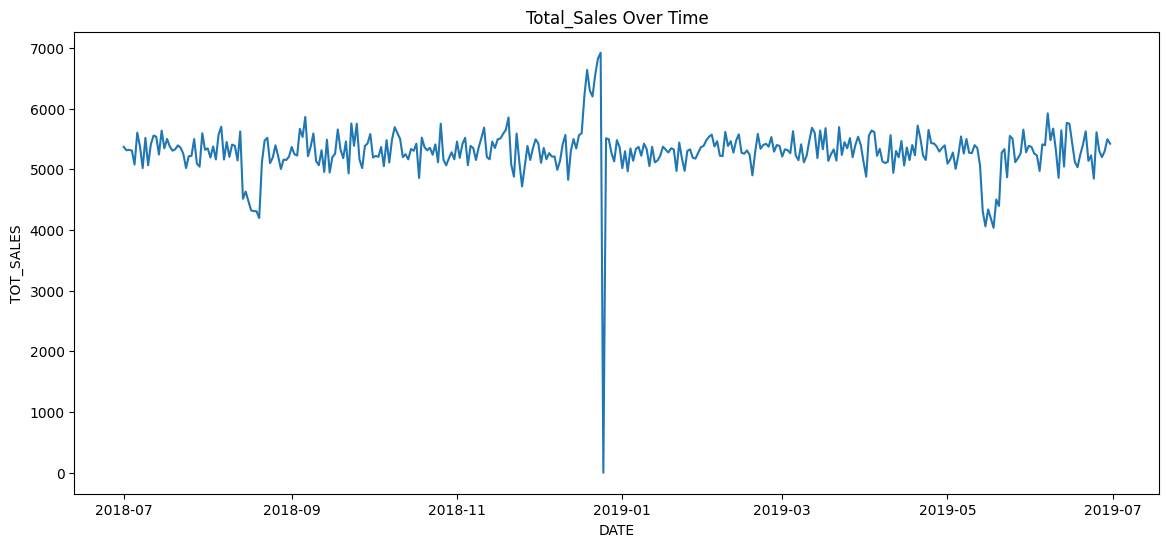

In [281]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df[['DATE','TOT_SALES']].groupby('DATE').sum(), x='DATE', y='TOT_SALES').set_title('Total_Sales Over Time')

In [282]:
tot_sales = df[['DATE','TOT_SALES']].groupby('DATE').sum()

In [283]:
sales_dec = tot_sales.query('"2018-12-01" <= DATE < "2019-01-01"').sort_values(by='DATE')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Total_Sales Over December Month')

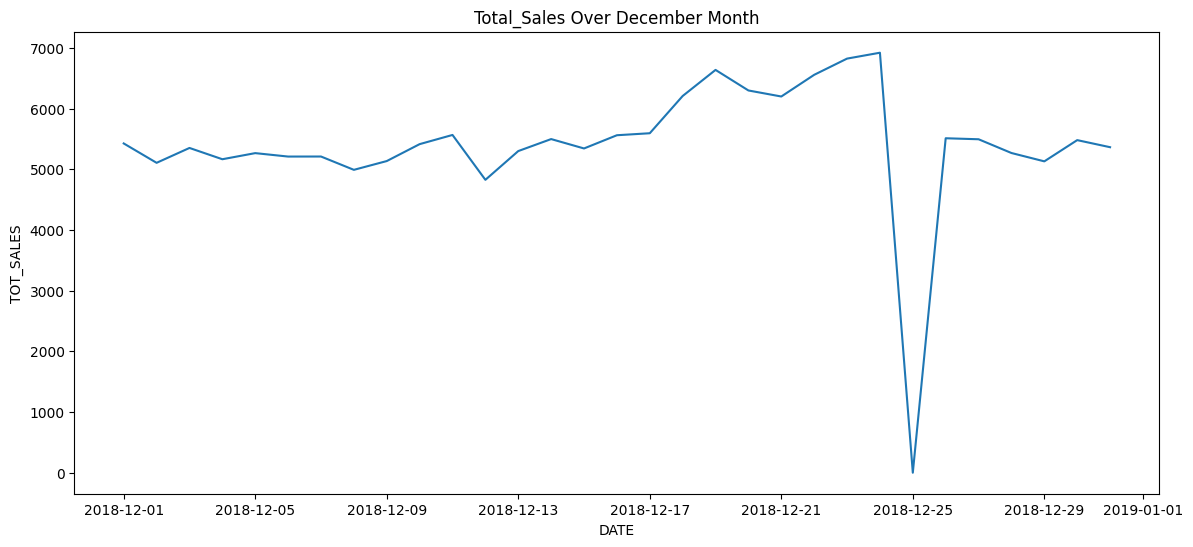

In [284]:
plt.figure(figsize=(14,6))
sns.lineplot(data=sales_dec, x='DATE', y='TOT_SALES').set_title('Total_Sales Over December Month')

In [285]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PDWT_grams
0,2018-07-01,51.0,51073.0,46774.0,102.0,Kettle Mozzarella Basil & Pesto,1.0,5.4,175.0
1,2018-07-01,216.0,216358.0,216188.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0
2,2018-07-01,203.0,203248.0,203329.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0
3,2018-07-01,75.0,75310.0,74681.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0
4,2018-07-01,23.0,23124.0,19481.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0


In [286]:
df.rename(columns={'PDWT_grams':'PACK_SIZE'}, inplace=True)

In [287]:
df['PACK_SIZE'].unique()

array([175., 150., 110., 165., 135., 380., 170., 134., 330., 270., 250.,
       210., 300.,  90., 220., 190., 200.,  70., 160., 180., 125.,  nan])

In [288]:
df['PACK_SIZE'].agg(['mean', 'max', 'min'])

mean    182.42554
max     380.00000
min      70.00000
Name: PACK_SIZE, dtype: float64

In [289]:
df.PACK_SIZE.value_counts()

PACK_SIZE
175.0    66389
150.0    43131
134.0    25102
110.0    22387
170.0    19983
165.0    15297
300.0    15166
330.0    12540
380.0     6416
270.0     6285
210.0     6272
200.0     4473
135.0     3257
250.0     3169
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Chips_Counts For Each Weight Category')

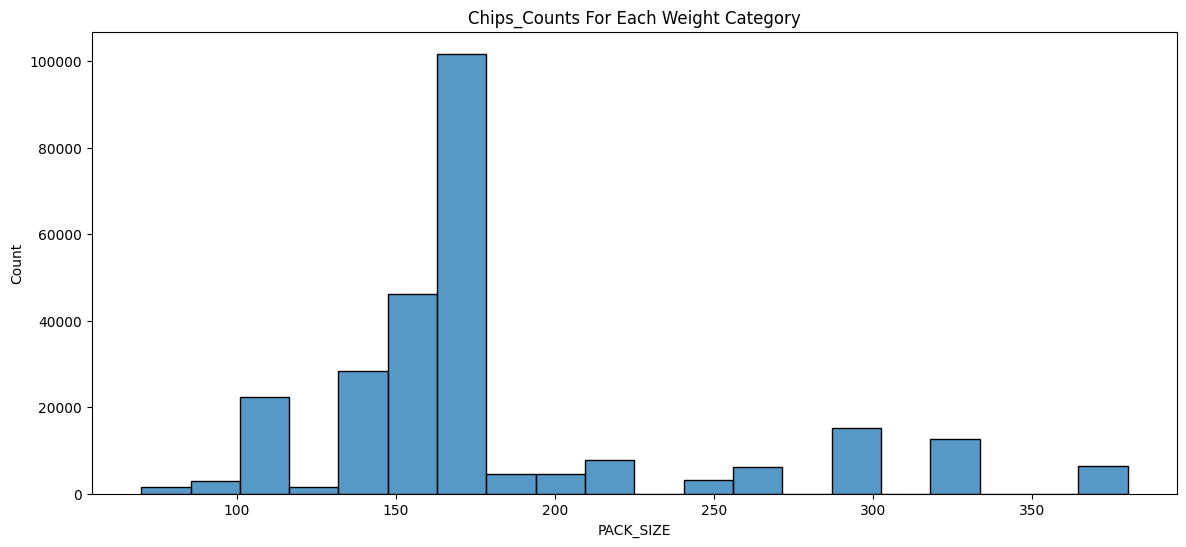

In [290]:
plt.figure(figsize=(14,6))
sns.histplot(df['PACK_SIZE'], bins=20).set_title('Chips_Counts For Each Weight Category')

In [291]:
#BRAND column

df['BRAND']= df['PROD_NAME'].str.split().str[0]

In [292]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-07-01,51.0,51073.0,46774.0,102.0,Kettle Mozzarella Basil & Pesto,1.0,5.4,175.0,Kettle
1,2018-07-01,216.0,216358.0,216188.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle
2,2018-07-01,203.0,203248.0,203329.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle
3,2018-07-01,75.0,75310.0,74681.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle
4,2018-07-01,23.0,23124.0,19481.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle


In [293]:
df['BRAND'].unique()

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smiths',
       'Thins', 'Doritos', 'Pringles', 'Dorito', 'Twisties', 'Grain',
       'Cheezels', 'Infzns', 'Old', 'Snbts', 'Natural', 'Burger', 'CCs',
       'RRD', 'Woolworths', 'Smith', 'WW', 'Red', 'Cheetos', 'GrnWves',
       'Sunbites', 'NCC', 'French', nan], dtype=object)

In [294]:
df['BRAND']=df['BRAND'].str.replace('Red', 'RRD', regex=False)

In [295]:
df['BRAND']=df['BRAND'].str.replace('Infzns', 'Infuzions', regex=False)

In [296]:
df['BRAND']=df['BRAND'].str.replace('Snbts', 'Sunbites', regex=False)

In [297]:
df['BRAND']=df['BRAND'].str.replace('Natural', 'NCC', regex=False)

In [298]:
df['BRAND']=df['BRAND'].str.replace('WW', 'Woolworths', regex=False)

In [299]:
df['BRAND']=df['BRAND'].str.replace('Smiths', 'Smith', regex=False)

In [300]:
df['BRAND'].unique()

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smith',
       'Thins', 'Doritos', 'Pringles', 'Dorito', 'Twisties', 'Grain',
       'Cheezels', 'Old', 'Sunbites', 'NCC', 'Burger', 'CCs', 'RRD',
       'Woolworths', 'Cheetos', 'GrnWves', 'French', nan], dtype=object)

In [301]:
df.query('BRAND == "CCs"')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
513,2018-07-01,169.0,169087.0,171127.0,91.0,CCs Tasty Cheese,2.0,4.2,175.0,CCs
514,2018-07-01,33.0,33053.0,29755.0,91.0,CCs Tasty Cheese,2.0,4.2,175.0,CCs
515,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese,2.0,4.2,175.0,CCs
516,2018-07-01,74.0,74285.0,73137.0,91.0,CCs Tasty Cheese,1.0,2.1,175.0,CCs
517,2018-07-01,24.0,24208.0,21476.0,91.0,CCs Tasty Cheese,2.0,4.2,175.0,CCs
...,...,...,...,...,...,...,...,...,...,...
264669,2019-06-30,70.0,70078.0,67940.0,66.0,CCs Nacho Cheese,2.0,4.2,175.0,CCs
264670,2019-06-30,106.0,106154.0,107674.0,66.0,CCs Nacho Cheese,2.0,4.2,175.0,CCs
264671,2019-06-30,137.0,137078.0,139348.0,66.0,CCs Nacho Cheese,2.0,4.2,175.0,CCs
264672,2019-06-30,232.0,232129.0,235937.0,66.0,CCs Nacho Cheese,2.0,4.2,175.0,CCs


In [302]:
df['BRAND']=df['BRAND'].str.replace('Grain', 'Grain Waves', regex=False)

In [303]:
df['BRAND']=df['BRAND'].str.replace('GrnWves', 'Grain Waves', regex=False)

In [304]:
df['BRAND']=df['BRAND'].str.replace('Dorito', 'Doritos', regex=False)

In [305]:
df['BRAND']=df['BRAND'].str.replace('Doritoss', 'Doritos', regex=False)

In [306]:
df['BRAND'].unique()

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smith',
       'Thins', 'Doritos', 'Pringles', 'Twisties', 'Grain Waves',
       'Cheezels', 'Old', 'Sunbites', 'NCC', 'Burger', 'CCs', 'RRD',
       'Woolworths', 'Cheetos', 'French', nan], dtype=object)

In [307]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-07-01,51.0,51073.0,46774.0,102.0,Kettle Mozzarella Basil & Pesto,1.0,5.4,175.0,Kettle
1,2018-07-01,216.0,216358.0,216188.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle
2,2018-07-01,203.0,203248.0,203329.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle
3,2018-07-01,75.0,75310.0,74681.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle
4,2018-07-01,23.0,23124.0,19481.0,102.0,Kettle Mozzarella Basil & Pesto,2.0,10.8,175.0,Kettle


In [308]:
df.BRAND.value_counts().reset_index()

,BRAND,count
0,Kettle,41288
1,Smith,31822
2,Doritos,28145
3,Pringles,25102
4,RRD,17779
5,Woolworths,14757
6,Infuzions,14201
7,Thins,14075
8,Cobs,9693
9,Tostitos,9471


In [309]:
df.shape

(264834, 10)

In [310]:
df_cd = pd.read_csv(r'/kaggle/input/quantium-forage-data-sets/QVI_purchase_behaviour.csv')

In [311]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [312]:
df_cd['LIFESTAGE'].value_counts(ascending=False).reset_index()

,LIFESTAGE,count
0,RETIREES,14805
1,OLDER SINGLES/COUPLES,14609
2,YOUNG SINGLES/COUPLES,14441
3,OLDER FAMILIES,9780
4,YOUNG FAMILIES,9178
5,MIDAGE SINGLES/COUPLES,7275
6,NEW FAMILIES,2549


In [313]:
df_cd_ls_c = df_cd['LIFESTAGE'].value_counts(ascending=False).reset_index()

In [314]:
df_cd['PREMIUM_CUSTOMER'].value_counts(ascending=False).reset_index()

,PREMIUM_CUSTOMER,count
0,Mainstream,29245
1,Budget,24470
2,Premium,18922


In [315]:
df_cd_pc_c = df_cd['PREMIUM_CUSTOMER'].value_counts(ascending=False).reset_index()

In [316]:
df_cd[df_cd['LYLTY_CARD_NBR'] == 226000.0]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


In [317]:
df_cd.drop(index=59694, inplace=True)

In [318]:
df.merge(df_cd, on='LYLTY_CARD_NBR', how='outer')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002.0,2.0,58.0,Red Rock Deli Chikn & Garlic Aioli,1.0,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003.0,3.0,52.0,Grain Waves Sour Cream & Chives,1.0,3.6,210.0,Grain Waves,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003.0,4.0,106.0,Natural ChipCo Hony Soy Chckn,1.0,3.0,175.0,NCC,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004.0,5.0,96.0,WW Original Stacked Chips,1.0,1.9,160.0,Woolworths,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2018-10-01,88.0,2370751.0,240394.0,60.0,Kettle Tortilla ChpsFeta & Garlic,2.0,9.2,150.0,Kettle,YOUNG FAMILIES,Premium
264830,2018-10-24,88.0,2370961.0,240480.0,70.0,Tyrrells Crisps Lightly Salted,2.0,8.4,165.0,Tyrrells,OLDER FAMILIES,Budget
264831,2018-10-27,88.0,2370961.0,240481.0,65.0,Old El Paso Salsa Dip Chnky Tom Ht,2.0,10.2,300.0,Old,OLDER FAMILIES,Budget
264832,2018-12-14,88.0,2373711.0,241815.0,16.0,Smiths Crinkle Chips Salt & Vinegar,2.0,11.4,330.0,Smith,YOUNG SINGLES/COUPLES,Mainstream


In [319]:
df_merged = df.merge(df_cd, on='LYLTY_CARD_NBR', how='outer')

In [320]:
df_merged.isna().value_counts()

DATE   STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  BRAND  LIFESTAGE  PREMIUM_CUSTOMER
False  False      False           False   False     False      False     False      False      False  False      False               264833
       True       True            True    True      True       True      True       True       True   True       True                     1
Name: count, dtype: int64

In [321]:
df = df_merged

In [322]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002.0,2.0,58.0,Red Rock Deli Chikn & Garlic Aioli,1.0,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003.0,3.0,52.0,Grain Waves Sour Cream & Chives,1.0,3.6,210.0,Grain Waves,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003.0,4.0,106.0,Natural ChipCo Hony Soy Chckn,1.0,3.0,175.0,NCC,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004.0,5.0,96.0,WW Original Stacked Chips,1.0,1.9,160.0,Woolworths,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2018-10-01,88.0,2370751.0,240394.0,60.0,Kettle Tortilla ChpsFeta & Garlic,2.0,9.2,150.0,Kettle,YOUNG FAMILIES,Premium
264830,2018-10-24,88.0,2370961.0,240480.0,70.0,Tyrrells Crisps Lightly Salted,2.0,8.4,165.0,Tyrrells,OLDER FAMILIES,Budget
264831,2018-10-27,88.0,2370961.0,240481.0,65.0,Old El Paso Salsa Dip Chnky Tom Ht,2.0,10.2,300.0,Old,OLDER FAMILIES,Budget
264832,2018-12-14,88.0,2373711.0,241815.0,16.0,Smiths Crinkle Chips Salt & Vinegar,2.0,11.4,330.0,Smith,YOUNG SINGLES/COUPLES,Mainstream


In [323]:
df_tcd = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

In [324]:
df_tcd

,LYLTY_CARD_NBR,TOT_SALES
0,230078.0,138.6
1,63197.0,132.8
2,259009.0,127.2
3,162039.0,126.8
4,58361.0,124.8
...,...,...
72631,151175.0,1.5
72632,41089.0,1.5
72633,169206.0,1.5
72634,136282.0,1.5


In [325]:
df['STORE_NBR']=df['STORE_NBR'].fillna(0).astype(int)

In [326]:
df['LYLTY_CARD_NBR']=df['LYLTY_CARD_NBR'].fillna(0).astype(int)

In [327]:
df['TXN_ID']=df['TXN_ID'].fillna(0).astype(int)

In [328]:
df['PROD_NBR']=df['PROD_NBR'].fillna(0).astype(int)

In [329]:
df['PROD_QTY']=df['PROD_QTY'].fillna(0).astype(int)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   PACK_SIZE         264833 non-null  float64       
 9   BRAND             264833 non-null  object        
 10  LIFESTAGE         264833 non-null  object        
 11  PREMIUM_CUSTOMER  264833 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 24.2+ MB


In [331]:
df.query('LYLTY_CARD_NBR == 230078')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
227711,2018-07-18,230,230078,232416,7,Smiths Crinkle Original,2,11.4,330.0,Smith,OLDER FAMILIES,Budget
227712,2018-07-31,230,230078,232417,85,RRD Honey Soy Chicken,2,6.0,165.0,RRD,OLDER FAMILIES,Budget
227713,2018-09-26,230,230078,232418,90,Tostitos Smoked Chipotle,2,8.8,175.0,Tostitos,OLDER FAMILIES,Budget
227714,2018-09-29,230,230078,232419,1,Smiths Crinkle Cut Chips Barbecue,2,5.8,170.0,Smith,OLDER FAMILIES,Budget
227715,2018-10-25,230,230078,232420,2,Cobs Popd Sour Crm & Chives Chips,2,7.6,110.0,Cobs,OLDER FAMILIES,Budget
227716,2018-10-29,230,230078,232421,87,Infuzions BBQ Rib Prawn Crackers,2,7.6,110.0,Infuzions,OLDER FAMILIES,Budget
227717,2018-11-18,230,230078,232422,79,Smiths Chip Thinly CutSaltVinegr,2,6.0,175.0,Smith,OLDER FAMILIES,Budget
227718,2018-12-23,230,230078,232424,17,Kettle Sensations BBQ & Maple,2,9.2,150.0,Kettle,OLDER FAMILIES,Budget
227719,2019-01-09,230,230078,232425,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135.0,Kettle,OLDER FAMILIES,Budget
227720,2019-02-18,230,230078,232426,88,Kettle Honey Soy Chicken,2,10.8,175.0,Kettle,OLDER FAMILIES,Budget


In [332]:
df.query('LYLTY_CARD_NBR == 259009')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
252263,2018-07-04,259,259009,257456,1,Smiths Crinkle Cut Chips Barbecue,2,5.8,170.0,Smith,OLDER SINGLES/COUPLES,Mainstream
252264,2018-07-19,259,259009,257457,15,Twisties Cheese,2,9.2,270.0,Twisties,OLDER SINGLES/COUPLES,Mainstream
252265,2018-08-30,259,259009,257458,51,Doritos Mexicana,2,8.8,170.0,Doritos,OLDER SINGLES/COUPLES,Mainstream
252266,2018-09-24,259,259009,257459,60,Kettle Tortilla ChpsFeta & Garlic,2,9.2,150.0,Kettle,OLDER SINGLES/COUPLES,Mainstream
252267,2018-10-13,259,259009,257460,88,Kettle Honey Soy Chicken,2,10.8,175.0,Kettle,OLDER SINGLES/COUPLES,Mainstream
252268,2018-10-13,259,259009,257460,41,Doritos Salsa Mild,2,5.2,300.0,Doritos,OLDER SINGLES/COUPLES,Mainstream
252269,2018-12-26,259,259009,257461,50,Tostitos Lightly Salted,2,8.8,175.0,Tostitos,OLDER SINGLES/COUPLES,Mainstream
252270,2018-12-27,259,259009,257462,22,Thins Chips Originl saltd,2,6.6,175.0,Thins,OLDER SINGLES/COUPLES,Mainstream
252271,2019-02-21,259,259009,257463,90,Tostitos Smoked Chipotle,2,8.8,175.0,Tostitos,OLDER SINGLES/COUPLES,Mainstream
252272,2019-03-13,259,259009,257464,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300.0,Old,OLDER SINGLES/COUPLES,Mainstream


In [333]:
tp_cd = df_tcd['LYLTY_CARD_NBR'][:20]

In [334]:
tp_cd

0     230078.0
1      63197.0
2     259009.0
3     162039.0
4      58361.0
5     230154.0
6      94185.0
7     130090.0
8     179228.0
9     172032.0
10    199157.0
11    116181.0
12    114163.0
13      3153.0
14     59333.0
15    164034.0
16     28020.0
17    116113.0
18    156054.0
19    199146.0
Name: LYLTY_CARD_NBR, dtype: float64

In [335]:
pd.set_option('display.max_rows',100)

In [336]:
df_cd['LIFESTAGE'].value_counts(ascending=False).reset_index()

,LIFESTAGE,count
0,RETIREES,14805
1,OLDER SINGLES/COUPLES,14609
2,YOUNG SINGLES/COUPLES,14441
3,OLDER FAMILIES,9779
4,YOUNG FAMILIES,9178
5,MIDAGE SINGLES/COUPLES,7275
6,NEW FAMILIES,2549


In [337]:
df.query('LYLTY_CARD_NBR in @tp_cd').groupby('LYLTY_CARD_NBR').value_counts(ascending=False).reset_index()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,count
0,3153,2018-07-04,3,1723,87,Infuzions BBQ Rib Prawn Crackers,2,7.6,110.0,Infuzions,MIDAGE SINGLES/COUPLES,Premium,1
1,3153,2018-07-13,3,1724,30,Doritos Corn Chips Cheese Supreme,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Premium,1
2,3153,2018-07-22,3,1725,17,Kettle Sensations BBQ & Maple,2,9.2,150.0,Kettle,MIDAGE SINGLES/COUPLES,Premium,1
3,3153,2018-08-21,3,1726,46,Kettle Original,2,10.8,175.0,Kettle,MIDAGE SINGLES/COUPLES,Premium,1
4,3153,2018-09-08,3,1727,81,Pringles Original Crisps,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Premium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,259009,2019-04-12,259,257465,84,GrnWves Plus Btroot & Chilli Jam,2,6.2,180.0,Grain Waves,OLDER SINGLES/COUPLES,Mainstream,1
296,259009,2019-04-25,259,257466,4,Dorito Corn Chp Supreme,2,13.0,380.0,Doritos,OLDER SINGLES/COUPLES,Mainstream,1
297,259009,2019-04-25,259,257466,94,Burger Rings,2,4.6,220.0,Burger,OLDER SINGLES/COUPLES,Mainstream,1
298,259009,2019-04-26,259,257467,88,Kettle Honey Soy Chicken,2,10.8,175.0,Kettle,OLDER SINGLES/COUPLES,Mainstream,1


In [338]:
df_tcd_plt = df.query('LYLTY_CARD_NBR in @tp_cd').groupby('LYLTY_CARD_NBR').value_counts(ascending=False).reset_index()

In [339]:
df_cd.query('LYLTY_CARD_NBR in @tp_cd')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
810,3153,MIDAGE SINGLES/COUPLES,Premium
7846,28020,OLDER FAMILIES,Premium
16001,58361,YOUNG FAMILIES,Budget
16363,59333,YOUNG FAMILIES,Premium
17292,63197,OLDER FAMILIES,Budget
25958,94185,YOUNG FAMILIES,Premium
31050,114163,OLDER FAMILIES,Budget
31586,116113,OLDER SINGLES/COUPLES,Premium
31654,116181,YOUNG FAMILIES,Premium
35338,130090,YOUNG FAMILIES,Budget


In [340]:
df.groupby('LYLTY_CARD_NBR')[['TOT_SALES','PROD_QTY']].sum().reset_index()

,LYLTY_CARD_NBR,TOT_SALES,PROD_QTY
0,0,0.0,0
1,1000,6.0,2
2,1002,2.7,1
3,1003,6.6,2
4,1004,1.9,1
...,...,...,...
72632,2370651,13.0,2
72633,2370701,7.2,2
72634,2370751,9.2,2
72635,2370961,18.6,4


In [341]:
df_cd_agg = df.groupby('LYLTY_CARD_NBR')[['TOT_SALES','PROD_QTY']].sum().reset_index()

In [342]:
df_cd_merged =df_cd.merge(df_cd_agg,on='LYLTY_CARD_NBR', how='inner')

In [343]:
df_cd_merged.sort_values(by='TOT_SALES', ascending=False)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY
60924,230078,OLDER FAMILIES,Budget,138.6,36
17292,63197,OLDER FAMILIES,Budget,132.8,32
69016,259009,OLDER SINGLES/COUPLES,Mainstream,127.2,30
42813,162039,OLDER FAMILIES,Mainstream,126.8,36
16001,58361,YOUNG FAMILIES,Budget,124.8,28
...,...,...,...,...,...
40348,151175,YOUNG FAMILIES,Budget,1.5,1
11310,41089,YOUNG SINGLES/COUPLES,Premium,1.5,1
45088,169206,YOUNG SINGLES/COUPLES,Premium,1.5,1
36833,136282,YOUNG SINGLES/COUPLES,Mainstream,1.5,1


In [344]:
df_cd_merged.groupby('PREMIUM_CUSTOMER')[['TOT_SALES', 'PROD_QTY']].sum().sort_values(by='TOT_SALES', ascending=False)

,TOT_SALES,PROD_QTY
PREMIUM_CUSTOMER,,
Mainstream,750744.50,193965
Budget,676211.55,177898
Premium,506152.95,132859


In [345]:
df_cd_pc = df_cd_merged.groupby('PREMIUM_CUSTOMER')[['TOT_SALES', 'PROD_QTY']].sum().sort_values(by='TOT_SALES', ascending=False)

In [346]:
df_cd_pc = df_cd_pc.merge(df_cd_pc_c, on='PREMIUM_CUSTOMER', how='inner')

In [347]:
df_cd_pc['Chips_Per_Customer'] = df_cd_pc['PROD_QTY']/df_cd_pc['count']

In [348]:
df_cd_pc

,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,count,Chips_Per_Customer
0,Mainstream,750744.50,193965,29245,6.632416
1,Budget,676211.55,177898,24470,7.270045
2,Premium,506152.95,132859,18922,7.021404


In [349]:
df_cd_pc['Sales_Per_Customer'] = df_cd_pc['TOT_SALES']/df_cd_pc['count']

In [350]:
df_cd_pc

,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,count,Chips_Per_Customer,Sales_Per_Customer
0,Mainstream,750744.50,193965,29245,6.632416,25.670867
1,Budget,676211.55,177898,24470,7.270045,27.634309
2,Premium,506152.95,132859,18922,7.021404,26.749442


In [351]:
df_cd_merged.groupby('LIFESTAGE')[['TOT_SALES', 'PROD_QTY']].sum().sort_values(by='TOT_SALES', ascending=False)

,TOT_SALES,PROD_QTY
LIFESTAGE,,
OLDER SINGLES/COUPLES,402420.75,104201
RETIREES,366470.90,94166
OLDER FAMILIES,352467.20,94592
YOUNG FAMILIES,316160.10,84561
YOUNG SINGLES/COUPLES,260405.30,66634
MIDAGE SINGLES/COUPLES,184751.30,47721
NEW FAMILIES,50433.45,12847


In [352]:
df_cd_ls = df_cd_merged.groupby('LIFESTAGE')[['TOT_SALES', 'PROD_QTY']].sum().sort_values(by='TOT_SALES', ascending=False)

In [353]:
df_cd_ls = df_cd_ls.merge(df_cd_ls_c, on='LIFESTAGE', how='inner')

In [354]:
df_cd_ls['Chips_Per_Customer'] = df_cd_ls['PROD_QTY']/df_cd_ls['count']

In [355]:
df_cd_ls

,LIFESTAGE,TOT_SALES,PROD_QTY,count,Chips_Per_Customer
0,OLDER SINGLES/COUPLES,402420.75,104201,14609,7.132658
1,RETIREES,366470.90,94166,14805,6.360419
2,OLDER FAMILIES,352467.20,94592,9780,9.671984
3,YOUNG FAMILIES,316160.10,84561,9178,9.213445
4,YOUNG SINGLES/COUPLES,260405.30,66634,14441,4.614223
5,MIDAGE SINGLES/COUPLES,184751.30,47721,7275,6.559588
6,NEW FAMILIES,50433.45,12847,2549,5.040016


In [356]:
df_cd_ls['Sales_Per_Customer'] = df_cd_ls['TOT_SALES']/ df_cd_ls['count']

In [357]:
df_cd_ls

,LIFESTAGE,TOT_SALES,PROD_QTY,count,Chips_Per_Customer,Sales_Per_Customer
0,OLDER SINGLES/COUPLES,402420.75,104201,14609,7.132658,27.546085
1,RETIREES,366470.90,94166,14805,6.360419,24.753185
2,OLDER FAMILIES,352467.20,94592,9780,9.671984,36.039591
3,YOUNG FAMILIES,316160.10,84561,9178,9.213445,34.447603
4,YOUNG SINGLES/COUPLES,260405.30,66634,14441,4.614223,18.032359
5,MIDAGE SINGLES/COUPLES,184751.30,47721,7275,6.559588,25.395368
6,NEW FAMILIES,50433.45,12847,2549,5.040016,19.785583


In [358]:
df_cd.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count().rename(columns= {'LYLTY_CARD_NBR':'Cutomer_Counts'})

Cutomer_Counts
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      1504
                       Mainstream                  3340
                       Premium                     2431
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588
OLDER FAMILIES         Budget                      4675
                       Mainstream                  2831
                       Premium                     2273
OLDER SINGLES/COUPLES  Budget                      4929
                       Mainstream                  4930
                       Premium                     4750
RETIREES               Budget                      4454
                       Mainstream                  6479
                       Premium                     3872
YOUNG FAMILIES         Budget                      4017
                       Mainstream                  2728
                       Premium                     2433
YOUNG SINGLES/COUPLES  Budget                      3779
                       Mainstream                  8088
                       Premium                     2574

In [359]:
df_cd_seg_c = df_cd.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count().rename(columns= {'LYLTY_CARD_NBR':'Cutomer_Counts'})
df_cd_seg_c = df_cd_seg_c.reset_index()

Text(0.5, 0, '')

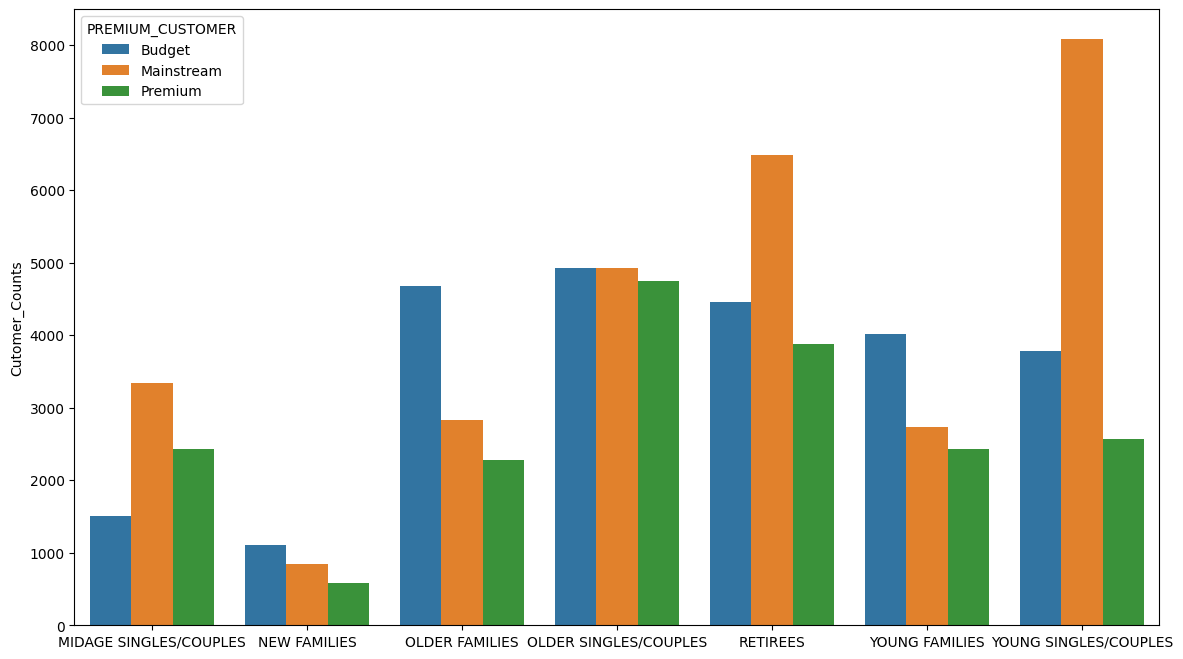

In [360]:
plt.figure(figsize=(14,8))
sns.barplot(x='LIFESTAGE', y='Cutomer_Counts', hue='PREMIUM_CUSTOMER',data=df_cd_seg_c)
plt.xlabel(None)

In [361]:
df_cd.query('LIFESTAGE == "MIDAGE SINGLES/COUPLES"').count()

LYLTY_CARD_NBR      7275
LIFESTAGE           7275
PREMIUM_CUSTOMER    7275
dtype: int64

In [362]:
df_cd_merged[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES','PROD_QTY']].groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).sum().sort_values(by='TOT_SALES', ascending=False)

TOT_SALES  PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            168363.25     45065
YOUNG SINGLES/COUPLES  Mainstream        157621.60     38632
RETIREES               Mainstream        155677.05     40518
YOUNG FAMILIES         Budget            139345.85     37111
OLDER SINGLES/COUPLES  Budget            136769.80     35220
                       Mainstream        133393.80     34997
                       Premium           132257.15     33984
RETIREES               Budget            113147.80     28764
OLDER FAMILIES         Mainstream        103445.55     27756
RETIREES               Premium            97646.05     24884
YOUNG FAMILIES         Mainstream         92788.75     25044
MIDAGE SINGLES/COUPLES Mainstream         90803.85     22699
YOUNG FAMILIES         Premium            84025.50     22406
OLDER FAMILIES         Premium            80658.40     21771
YOUNG SINGLES/COUPLES  Budget             61141.60     16671
MIDAGE SINGLES/COUPLES Premium            58432.65     15526
YOUNG SINGLES/COUPLES  Premium            41642.10     11331
MIDAGE SINGLES/COUPLES Budget             35514.80      9496
NEW FAMILIES           Budget             21928.45      5571
                       Mainstream         17013.90      4319
                       Premium            11491.10      2957

In [363]:
df_cd_seg = df_cd_merged[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES','PROD_QTY']].groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).sum().sort_values(by='TOT_SALES', ascending=False)

In [364]:
df_cd_seg

TOT_SALES  PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            168363.25     45065
YOUNG SINGLES/COUPLES  Mainstream        157621.60     38632
RETIREES               Mainstream        155677.05     40518
YOUNG FAMILIES         Budget            139345.85     37111
OLDER SINGLES/COUPLES  Budget            136769.80     35220
                       Mainstream        133393.80     34997
                       Premium           132257.15     33984
RETIREES               Budget            113147.80     28764
OLDER FAMILIES         Mainstream        103445.55     27756
RETIREES               Premium            97646.05     24884
YOUNG FAMILIES         Mainstream         92788.75     25044
MIDAGE SINGLES/COUPLES Mainstream         90803.85     22699
YOUNG FAMILIES         Premium            84025.50     22406
OLDER FAMILIES         Premium            80658.40     21771
YOUNG SINGLES/COUPLES  Budget             61141.60     16671
MIDAGE SINGLES/COUPLES Premium            58432.65     15526
YOUNG SINGLES/COUPLES  Premium            41642.10     11331
MIDAGE SINGLES/COUPLES Budget             35514.80      9496
NEW FAMILIES           Budget             21928.45      5571
                       Mainstream         17013.90      4319
                       Premium            11491.10      2957

In [365]:
df_cd_seg.merge(df_cd_seg_c, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'], how='inner')

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,Cutomer_Counts
0,OLDER FAMILIES,Budget,168363.25,45065,4675
1,YOUNG SINGLES/COUPLES,Mainstream,157621.60,38632,8088
2,RETIREES,Mainstream,155677.05,40518,6479
3,YOUNG FAMILIES,Budget,139345.85,37111,4017
4,OLDER SINGLES/COUPLES,Budget,136769.80,35220,4929
5,OLDER SINGLES/COUPLES,Mainstream,133393.80,34997,4930
6,OLDER SINGLES/COUPLES,Premium,132257.15,33984,4750
7,RETIREES,Budget,113147.80,28764,4454
8,OLDER FAMILIES,Mainstream,103445.55,27756,2831
9,RETIREES,Premium,97646.05,24884,3872


In [366]:
df_cd_seg = df_cd_seg.merge(df_cd_seg_c, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'], how='inner')

In [367]:
df_cd_seg['Sales_Per_Seg'] = df_cd_seg['PROD_QTY']/df_cd_seg['Cutomer_Counts']

In [368]:
df_cd_seg['Chips_Per_Seg'] = df_cd_seg['TOT_SALES']/df_cd_seg['Cutomer_Counts']

In [369]:
df_cd_seg['avg_price'] = df_cd_seg['TOT_SALES']/df_cd_seg['PROD_QTY']

In [370]:
df_cd_seg

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,Cutomer_Counts,Sales_Per_Seg,Chips_Per_Seg,avg_price
0,OLDER FAMILIES,Budget,168363.25,45065,4675,9.639572,36.013529,3.736009
1,YOUNG SINGLES/COUPLES,Mainstream,157621.60,38632,8088,4.776459,19.488328,4.080079
2,RETIREES,Mainstream,155677.05,40518,6479,6.253743,24.027944,3.842170
3,YOUNG FAMILIES,Budget,139345.85,37111,4017,9.238486,34.689034,3.754840
4,OLDER SINGLES/COUPLES,Budget,136769.80,35220,4929,7.145466,27.747981,3.883299
5,OLDER SINGLES/COUPLES,Mainstream,133393.80,34997,4930,7.098783,27.057566,3.811578
6,OLDER SINGLES/COUPLES,Premium,132257.15,33984,4750,7.154526,27.843611,3.891748
7,RETIREES,Budget,113147.80,28764,4454,6.458015,25.403637,3.933660
8,OLDER FAMILIES,Mainstream,103445.55,27756,2831,9.804309,36.540286,3.726962
9,RETIREES,Premium,97646.05,24884,3872,6.426653,25.218505,3.924050


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'OLDER FAMILIES'),
  Text(1, 0, 'YOUNG SINGLES/COUPLES'),
  Text(2, 0, 'RETIREES'),
  Text(3, 0, 'YOUNG FAMILIES'),
  Text(4, 0, 'OLDER SINGLES/COUPLES'),
  Text(5, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(6, 0, 'NEW FAMILIES')])

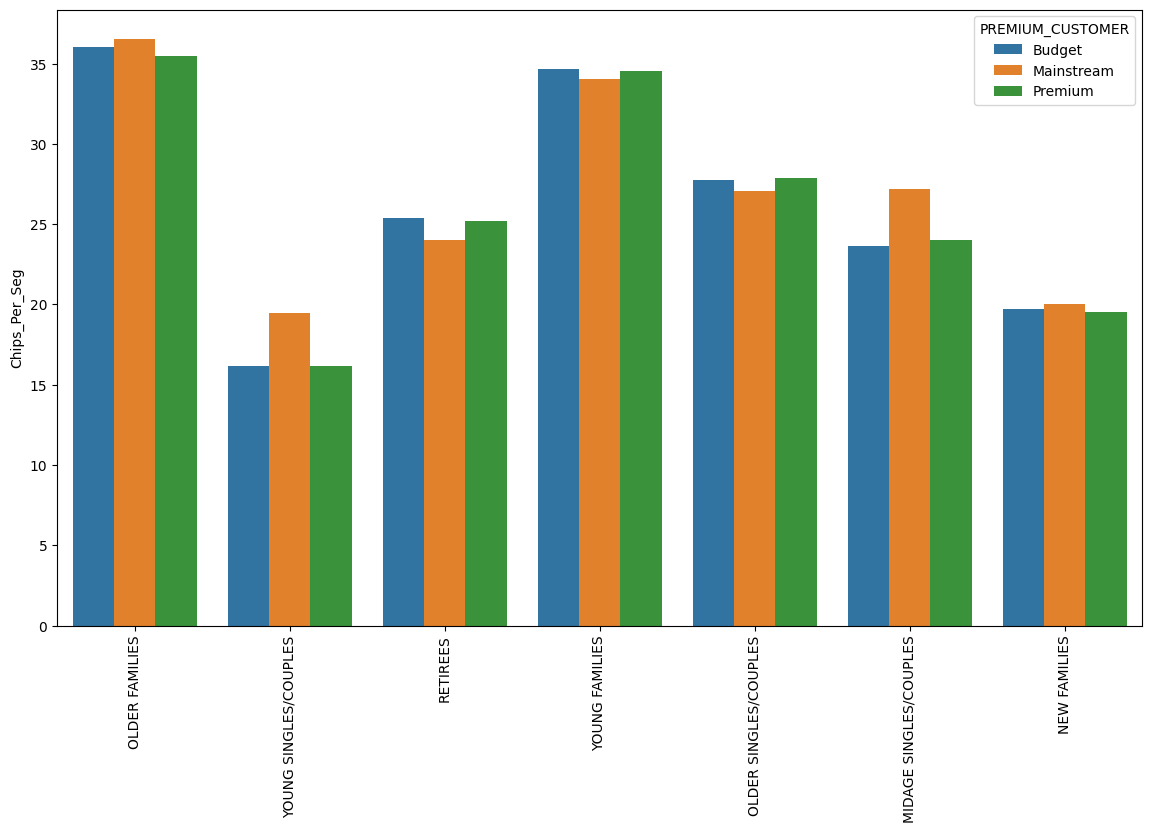

In [371]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_cd_seg, x='LIFESTAGE', y='Chips_Per_Seg', hue='PREMIUM_CUSTOMER')
plt.xlabel(None)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'OLDER FAMILIES'),
  Text(1, 0, 'YOUNG SINGLES/COUPLES'),
  Text(2, 0, 'RETIREES'),
  Text(3, 0, 'YOUNG FAMILIES'),
  Text(4, 0, 'OLDER SINGLES/COUPLES'),
  Text(5, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(6, 0, 'NEW FAMILIES')])

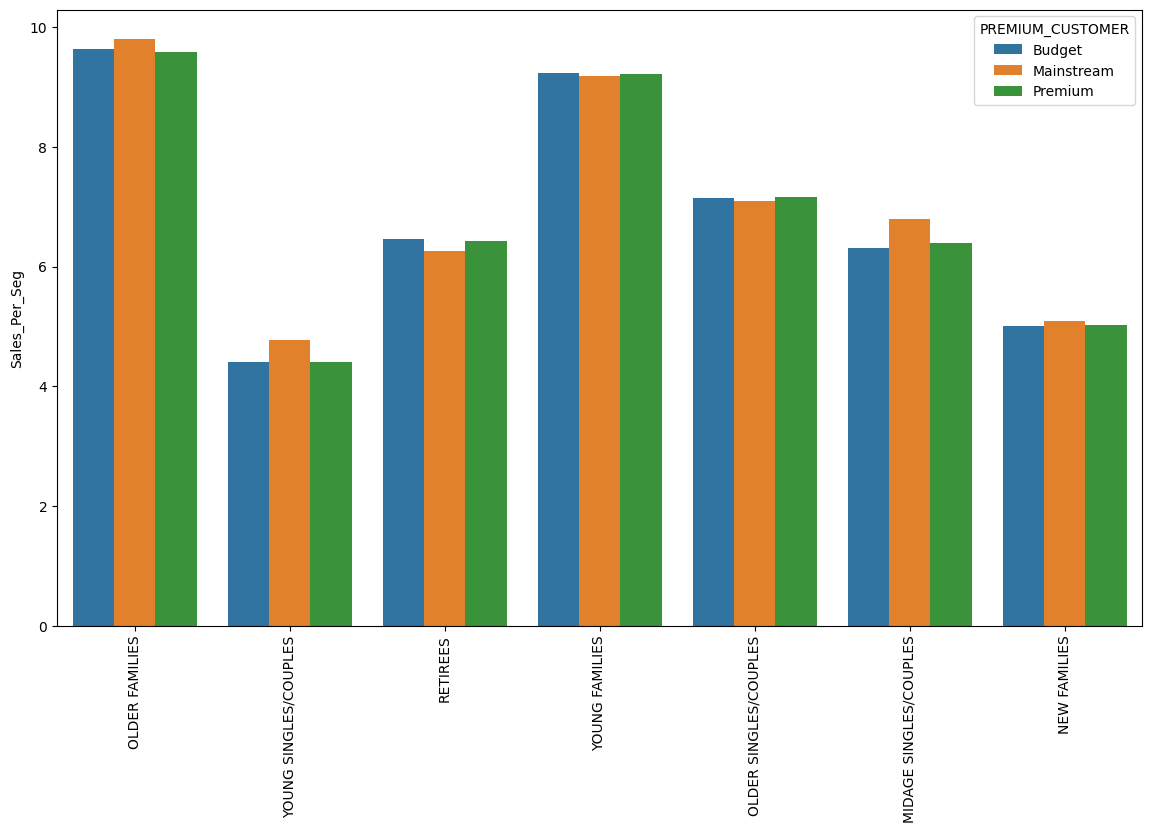

In [372]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_cd_seg, x='LIFESTAGE', y='Sales_Per_Seg', hue='PREMIUM_CUSTOMER')
plt.xlabel(None)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'OLDER FAMILIES'),
  Text(1, 0, 'YOUNG SINGLES/COUPLES'),
  Text(2, 0, 'RETIREES'),
  Text(3, 0, 'YOUNG FAMILIES'),
  Text(4, 0, 'OLDER SINGLES/COUPLES'),
  Text(5, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(6, 0, 'NEW FAMILIES')])

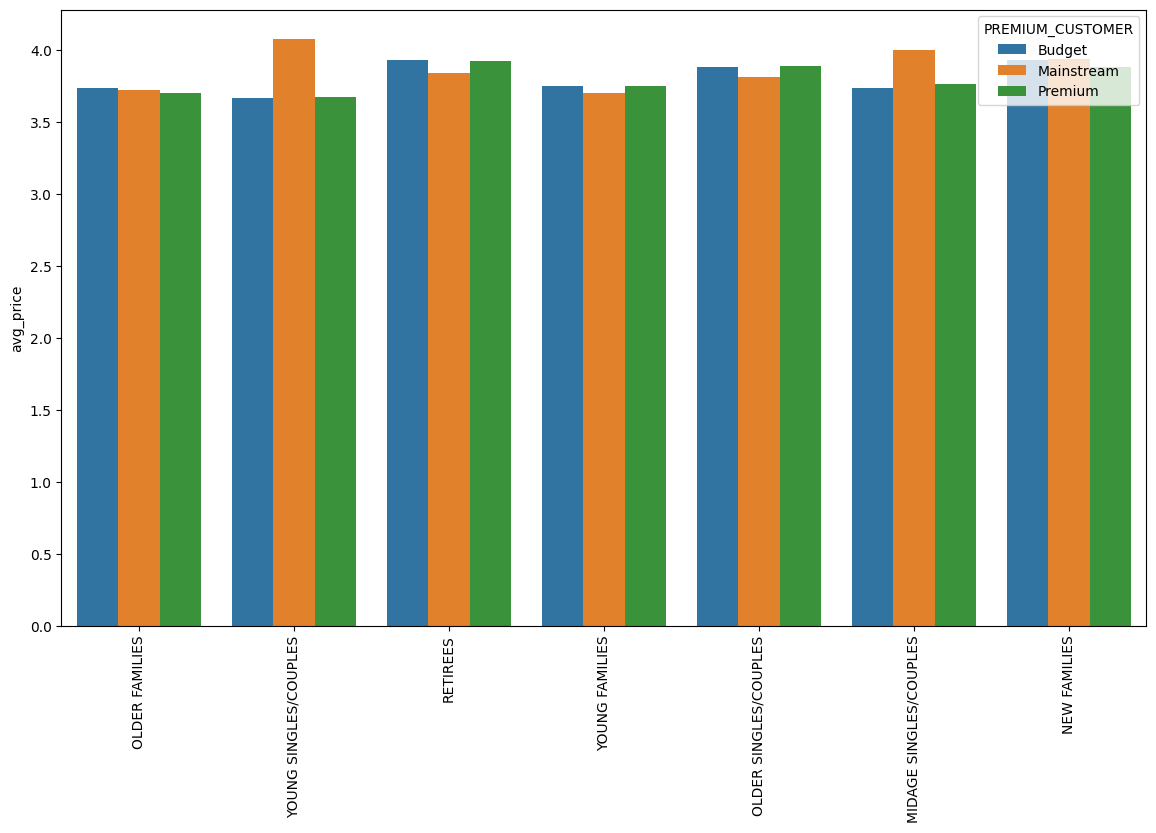

In [373]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_cd_seg, x='LIFESTAGE', y='avg_price', hue='PREMIUM_CUSTOMER')
plt.xlabel(None)
plt.xticks(rotation=90)

Text(0.5, 0, '')

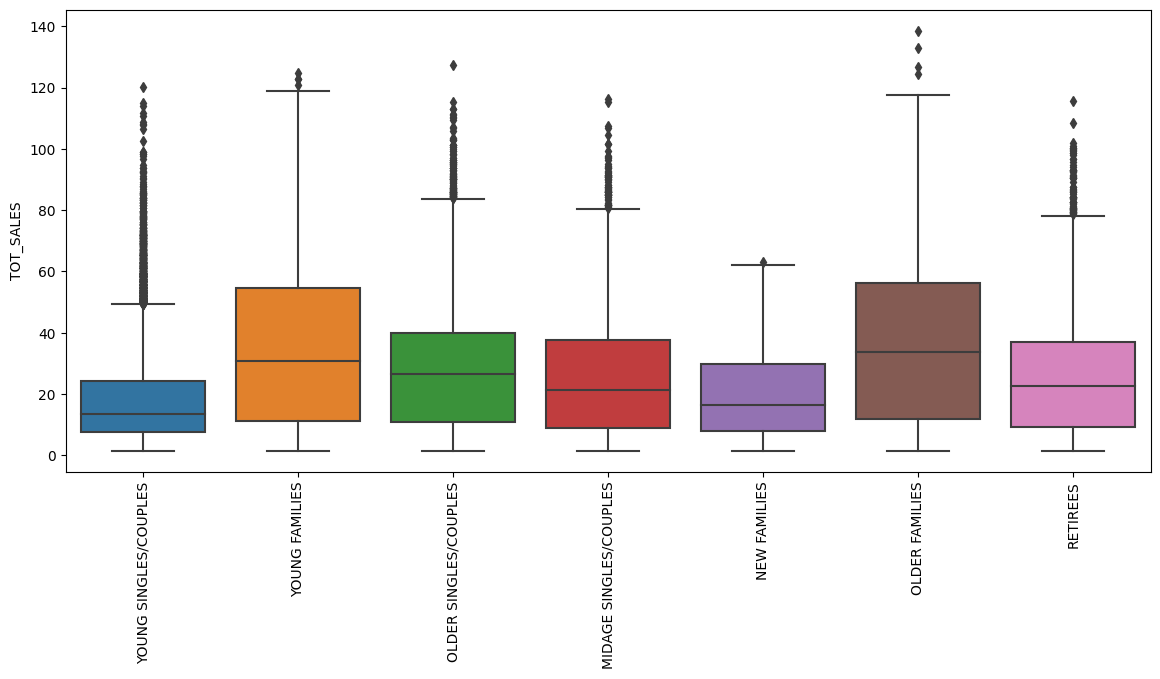

In [374]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df_cd_merged['LIFESTAGE'], y=df_cd_merged['TOT_SALES'])
plt.xticks(rotation=90)
plt.xlabel(None)

Text(0, 0.5, '')

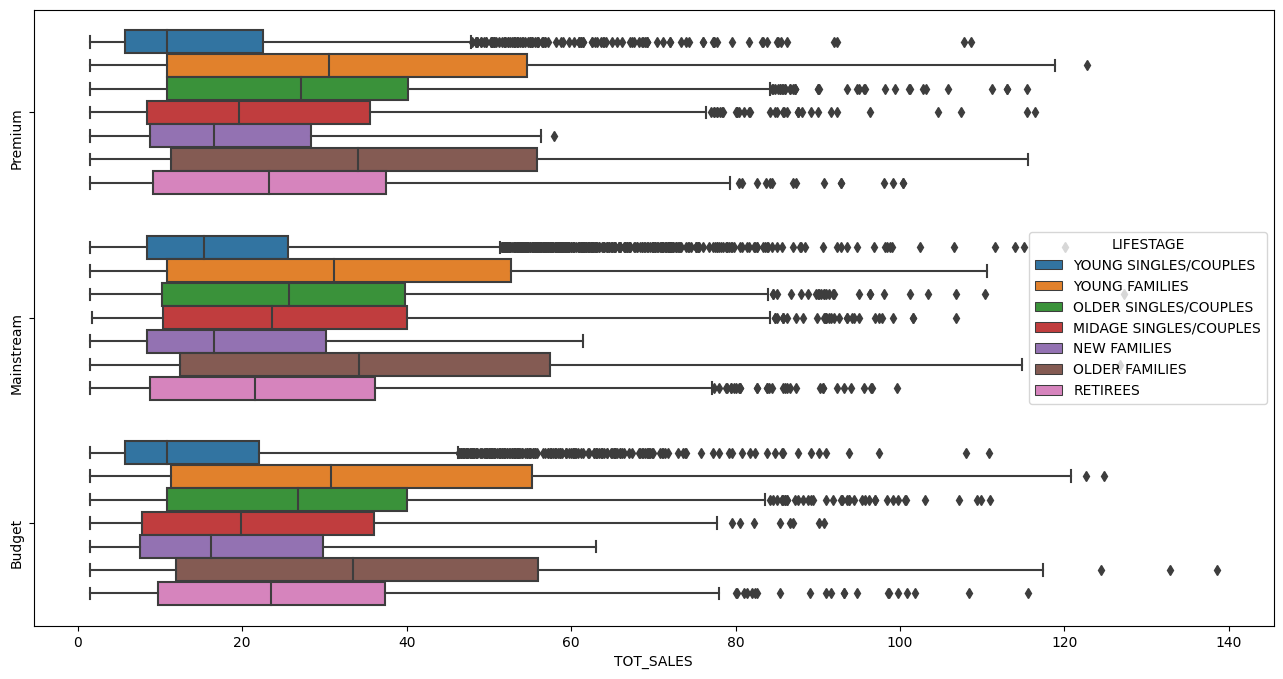

In [375]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df_cd_merged['TOT_SALES'], y=df_cd_merged['PREMIUM_CUSTOMER'], hue=df_cd_merged['LIFESTAGE'])
plt.yticks(rotation=90)
plt.ylabel(None)

In [376]:
df_cd_seg

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,Cutomer_Counts,Sales_Per_Seg,Chips_Per_Seg,avg_price
0,OLDER FAMILIES,Budget,168363.25,45065,4675,9.639572,36.013529,3.736009
1,YOUNG SINGLES/COUPLES,Mainstream,157621.60,38632,8088,4.776459,19.488328,4.080079
2,RETIREES,Mainstream,155677.05,40518,6479,6.253743,24.027944,3.842170
3,YOUNG FAMILIES,Budget,139345.85,37111,4017,9.238486,34.689034,3.754840
4,OLDER SINGLES/COUPLES,Budget,136769.80,35220,4929,7.145466,27.747981,3.883299
5,OLDER SINGLES/COUPLES,Mainstream,133393.80,34997,4930,7.098783,27.057566,3.811578
6,OLDER SINGLES/COUPLES,Premium,132257.15,33984,4750,7.154526,27.843611,3.891748
7,RETIREES,Budget,113147.80,28764,4454,6.458015,25.403637,3.933660
8,OLDER FAMILIES,Mainstream,103445.55,27756,2831,9.804309,36.540286,3.726962
9,RETIREES,Premium,97646.05,24884,3872,6.426653,25.218505,3.924050


In [377]:
from scipy.stats import ttest_ind

In [378]:
t_test_grp1 = df_cd_seg.query('LIFESTAGE == ["YOUNG SINGLES/COUPLES","MIDAGE SINGLES/COUPLES"] and PREMIUM_CUSTOMER == "Mainstream"')[['avg_price']]

In [379]:
t_test_grp2 = df_cd_seg.query('LIFESTAGE == ["YOUNG SINGLES/COUPLES","MIDAGE SINGLES/COUPLES"] and PREMIUM_CUSTOMER == ["Budget","Premium"]')[['avg_price']]

In [380]:
ttest_ind(t_test_grp1, t_test_grp2)

TtestResult(statistic=array([7.60688692]), pvalue=array([0.00160278]), df=array([4.]))

P_value = 0.0016

Our Initial hypothesis of the difference between the 2 sample groups (1.YOUNG SINGLES/COUPLES","MIDAGE SINGLES/COUPLES : Mainstream, 2.YOUNG SINGLES/COUPLES","MIDAGE SINGLES/COUPLES:Budget & Premium) is significantly high is being REJECTED.


Text(0, 0.5, '')

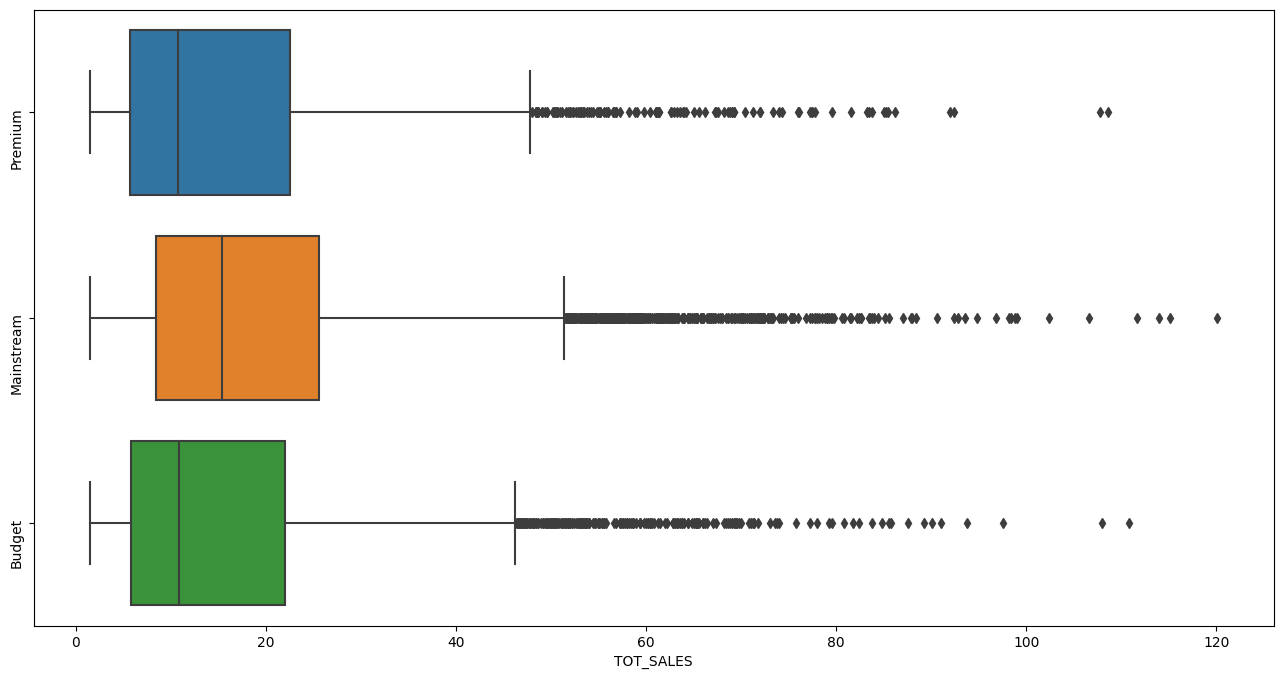

In [381]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_cd_merged.query('LIFESTAGE == "YOUNG SINGLES/COUPLES"'), x=('TOT_SALES'), y='PREMIUM_CUSTOMER')
plt.yticks(rotation=90)
plt.ylabel(None)

Text(0, 0.5, '')

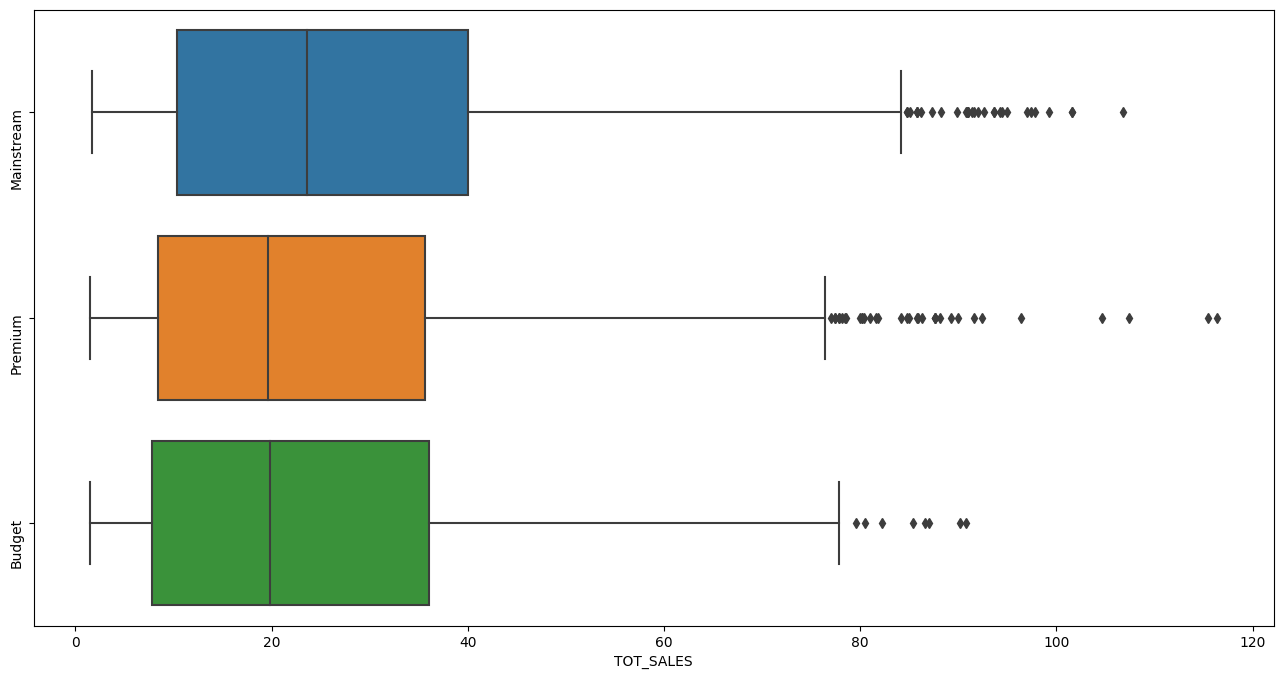

In [382]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_cd_merged.query('LIFESTAGE == "MIDAGE SINGLES/COUPLES"'), x='TOT_SALES', y='PREMIUM_CUSTOMER')
plt.yticks(rotation=90)
plt.ylabel(None)

In [383]:
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn & Garlic Aioli,1,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream & Chives,1,3.6,210.0,Grain Waves,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn,1,3.0,175.0,NCC,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips,1,1.9,160.0,Woolworths,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta & Garlic,2,9.2,150.0,Kettle,YOUNG FAMILIES,Premium
264830,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted,2,8.4,165.0,Tyrrells,OLDER FAMILIES,Budget
264831,2018-10-27,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300.0,Old,OLDER FAMILIES,Budget
264832,2018-12-14,88,2373711,241815,16,Smiths Crinkle Chips Salt & Vinegar,2,11.4,330.0,Smith,YOUNG SINGLES/COUPLES,Mainstream


In [384]:
df_merged.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" and PREMIUM_CUSTOMER == "Mainstream"')['BRAND'].value_counts().reset_index()

,BRAND,count
0,Kettle,3844
1,Doritos,2541
2,Pringles,2315
3,Smith,1988
4,Infuzions,1250
5,Thins,1166
6,RRD,969
7,Twisties,900
8,Tostitos,890
9,Old,867


In [385]:
df_merged.groupby('PACK_SIZE')['BRAND'].value_counts()

PACK_SIZE  BRAND      
70.0       Infuzions       1507
90.0       Sunbites        3008
110.0      Infuzions      12694
           Cobs            9693
125.0      Cheezels        1454
134.0      Pringles       25102
135.0      Kettle          3257
150.0      Kettle         19009
           RRD            10372
           Smith           7374
           Doritos         6376
160.0      Woolworths      2970
165.0      RRD             7407
           Tyrrells        6442
           Cheetos         1448
170.0      Doritos        12613
           Smith           7370
175.0      Kettle         19022
           Thins          14075
           Tostitos        9471
           Smith           7506
           NCC             7469
           CCs             4551
           Woolworths      2877
           French          1418
180.0      Grain Waves     1468
190.0      Woolworths      1516
           Cheetos         1479
200.0      Woolworths      4473
210.0      Grain Waves     6272
220.0      Burger

In [386]:
df_merged.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" and PREMIUM_CUSTOMER == "Mainstream" and PACK_SIZE >= 300')['BRAND'].value_counts().reset_index()

,BRAND,count
0,Smith,928
1,Old,867
2,Doritos,768
3,Cheezels,287
4,Woolworths,120


In [387]:
df_merged.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" and PREMIUM_CUSTOMER == "Budget" and PACK_SIZE >= 300')['BRAND'].value_counts().reset_index()

,BRAND,count
0,Doritos,315
1,Old,279
2,Smith,261
3,Woolworths,159
4,Cheezels,85


In [388]:
df_merged.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" and PREMIUM_CUSTOMER == "Premium" and PACK_SIZE >= 300')['BRAND'].value_counts().reset_index()

,BRAND,count
0,Doritos,206
1,Smith,203
2,Old,178
3,Woolworths,105
4,Cheezels,65


In [389]:
df_merged.query('LIFESTAGE == "OLDER FAMILIES" and PREMIUM_CUSTOMER == "Mainstream" and PACK_SIZE >= 300')[['BRAND']].value_counts()

BRAND     
Doritos       512
Smith         486
Old           474
Woolworths    173
Cheezels      133
Name: count, dtype: int64

In [390]:
df_merged.query('LIFESTAGE == "OLDER FAMILIES" and PREMIUM_CUSTOMER == "Budget" and PACK_SIZE >= 300')[['BRAND']].value_counts()

BRAND     
Doritos       826
Smith         820
Old           758
Cheezels      275
Woolworths    275
Name: count, dtype: int64

In [391]:
df_merged.query('LIFESTAGE == "OLDER FAMILIES" and PREMIUM_CUSTOMER == "Premium" and PACK_SIZE >= 300')[['BRAND']].value_counts()

BRAND     
Smith         388
Doritos       376
Old           357
Woolworths    145
Cheezels      108
Name: count, dtype: int64

In [392]:
df_merged.groupby(['PACK_SIZE','BRAND'])[['LIFESTAGE', 'PREMIUM_CUSTOMER']].value_counts()[-100:]

PACK_SIZE  BRAND     LIFESTAGE               PREMIUM_CUSTOMER
330.0      Cheezels  OLDER SINGLES/COUPLES   Budget              223
                     RETIREES                Budget              201
                     OLDER SINGLES/COUPLES   Mainstream          190
                     MIDAGE SINGLES/COUPLES  Mainstream          186
                     RETIREES                Premium             149
                     YOUNG FAMILIES          Mainstream          145
                                             Premium             142
                     OLDER FAMILIES          Mainstream          133
                                             Premium             108
                     MIDAGE SINGLES/COUPLES  Premium             102
                     YOUNG SINGLES/COUPLES   Budget               85
                                             Premium              65
                     MIDAGE SINGLES/COUPLES  Budget               47
                     NEW FAMILIES        

In [393]:
df_merged.groupby('BRAND')['BRAND'].value_counts().sort_values(ascending=False)

BRAND
Kettle         41288
Smith          31822
Doritos        28145
Pringles       25102
RRD            17779
Woolworths     14757
Infuzions      14201
Thins          14075
Cobs            9693
Tostitos        9471
Twisties        9454
Old             9324
Grain Waves     7740
NCC             7469
Tyrrells        6442
Cheezels        4603
CCs             4551
Sunbites        3008
Cheetos         2927
Burger          1564
French          1418
Name: count, dtype: int64

In [394]:
df_merged.groupby('PACK_SIZE')['PACK_SIZE'].value_counts().sort_values(ascending=False)

PACK_SIZE
175.0    66389
150.0    43131
134.0    25102
110.0    22387
170.0    19983
165.0    15297
300.0    15166
330.0    12540
380.0     6416
270.0     6285
210.0     6272
200.0     4473
135.0     3257
250.0     3169
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: count, dtype: int64

# Task 1 Finished with
   
Young Families & Old Families with Highest Spending segment

Mainstream: YOUNG SINGLES/COUPLES & MIDAGE SINGLES/COUPLES with High Avg_Price_Per_Chips

Kettle,Smith & Doritos as the Most sold Brands

175g Most sold Pack Size 

Smith & Doritos Highest sold with larger packs chips